# Homework

## Problem 1

Let $f(x) = 2\sin x - \cos{2x}$. Write a function `beauty_derivative_plot` that takes a point $x$ and plots the function $f(x)$ and its derivative $f'(x)$ in the range $x \in [-2\pi, 2\pi]$. The function should also plot the tangent line to the function at the point $x$.

Example of output for $x = -3, -2, 1.7$:

```python
beauty_derivative_plot(-3)
```
<img src="https://i.ibb.co/zTdYLC0J/tangent-line-3-0.png" width="600"/>

```python
beauty_derivative_plot(-2)
```
<img src="https://i.ibb.co/hFXNZ7wS/tangent-line-2-0.png" width="600"/>

```python
beauty_derivative_plot(1.7)
```
<img src="https://i.ibb.co/217yHstn/tangent-line-1-7.png" width="600"/>

График для x = -3:


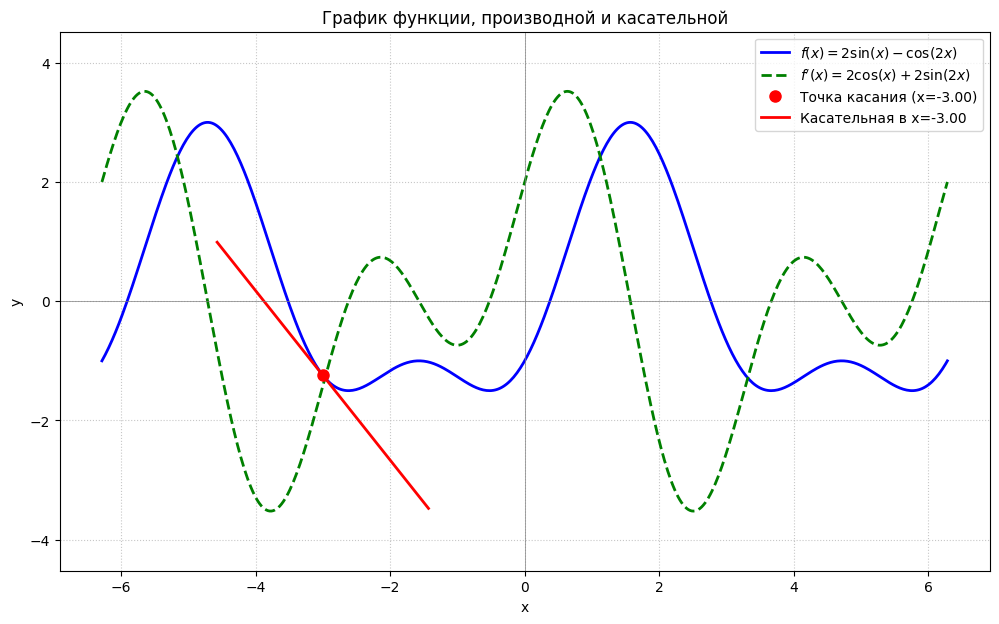


График для x = -2:


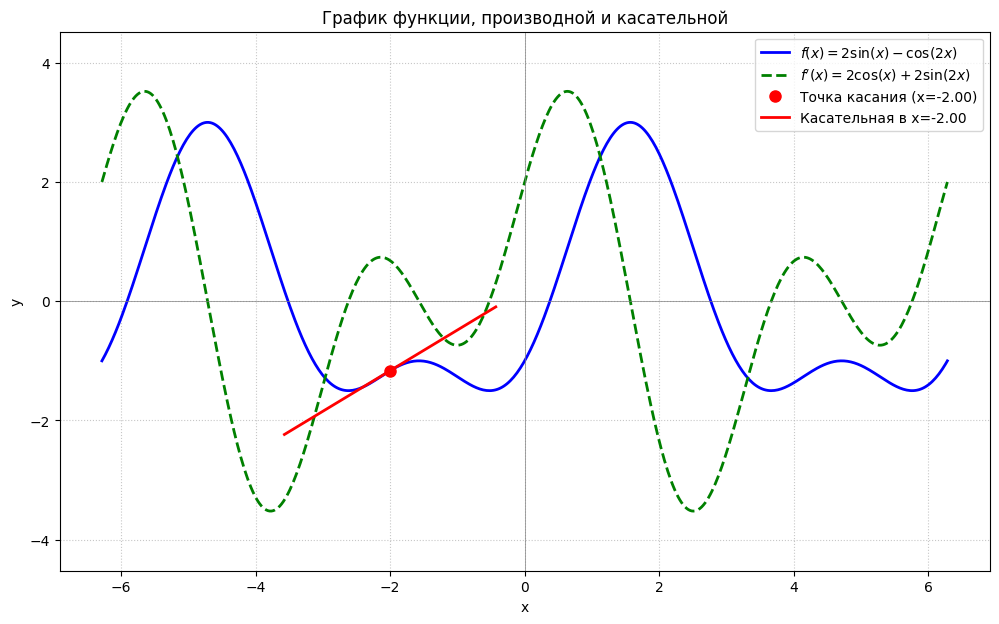


График для x = 1.7:


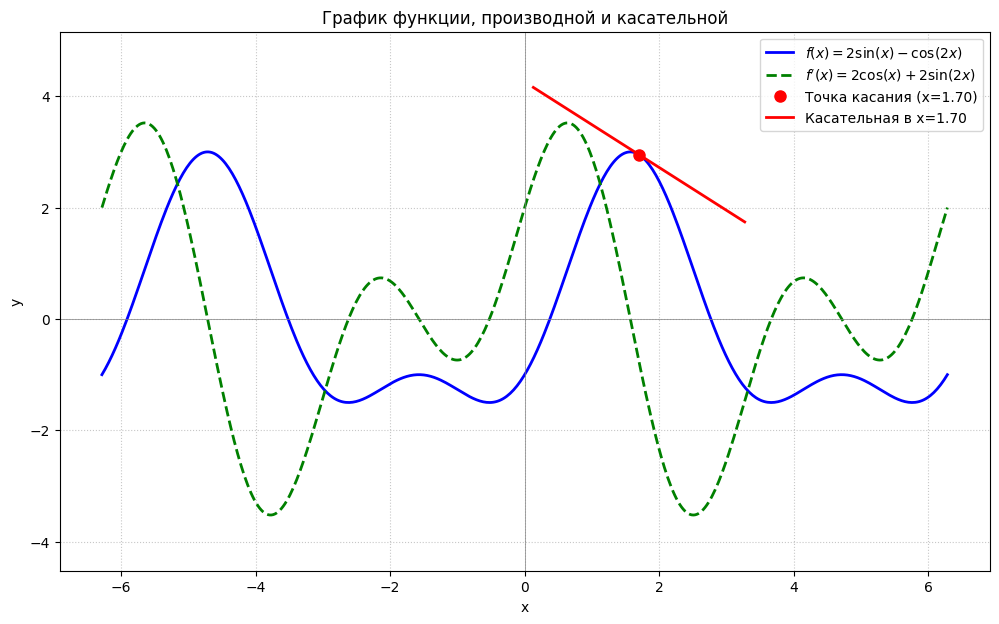

In [23]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
        return 2 * np.sin(x) - np.cos(2 * x)

def f_prime(x):
        return 2 * np.cos(x) + 2 * np.sin(2 * x)

def beauty_derivative_plot(point_x):
    x_range = np.linspace(-2 * np.pi, 2 * np.pi, 500)

    y_f = f(x_range)
    y_f_prime = f_prime(x_range)

    y_at_point_x = f(point_x) #кас
    slope_at_point_x = f_prime(point_x)

    tangent_x_start = point_x - np.pi/2 #интервал для кас
    tangent_x_end = point_x + np.pi/2

    tangent_x_start = max(tangent_x_start, -2 * np.pi) # обрезаем до основного диапазона, если надо
    tangent_x_end = min(tangent_x_end, 2 * np.pi)

    x_tangent = np.linspace(tangent_x_start, tangent_x_end, 100)
    y_tangent = slope_at_point_x * (x_tangent - point_x) + y_at_point_x

    plt.figure(figsize=(12, 7))

    plt.plot(x_range, y_f, label=r'$f(x) = 2\sin(x) - \cos(2x)$', color='blue', linewidth=2)

    plt.plot(x_range, y_f_prime, label=r"$f'(x) = 2\cos(x) + 2\sin(2x)$", color='green', linestyle='--', linewidth=2)

    plt.plot(point_x, y_at_point_x, 'ro', markersize=8, label=f'Точка касания (x={point_x:.2f})')

    plt.plot(x_tangent, y_tangent, label=f'Касательная в x={point_x:.2f}', color='red', linestyle='-', linewidth=2)

    plt.title('График функции, производной и касательной')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='gray', linewidth=0.5)
    plt.axvline(0, color='gray', linewidth=0.5)
    plt.grid(True, linestyle=':', alpha=0.7)
    plt.legend()

    plt.ylim(min(np.min(y_f), np.min(y_f_prime), np.min(y_tangent) if len(y_tangent) > 0 else 0) - 1,
             max(np.max(y_f), np.max(y_f_prime), np.max(y_tangent) if len(y_tangent) > 0 else 0) + 1)

    plt.show()


print("График для x = -3:")
beauty_derivative_plot(-3)

print("\nГрафик для x = -2:")
beauty_derivative_plot(-2)

print("\nГрафик для x = 1.7:")
beauty_derivative_plot(1.7)

## Problem 2

The data in [populations.txt](http://www.scipy-lectures.org/_downloads/populations.txt) describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Get the data with
```python
np.loadtxt('http://www.scipy-lectures.org/_downloads/populations.txt')
```
and do the following exercises **without for-loops (!!!)**.

- Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


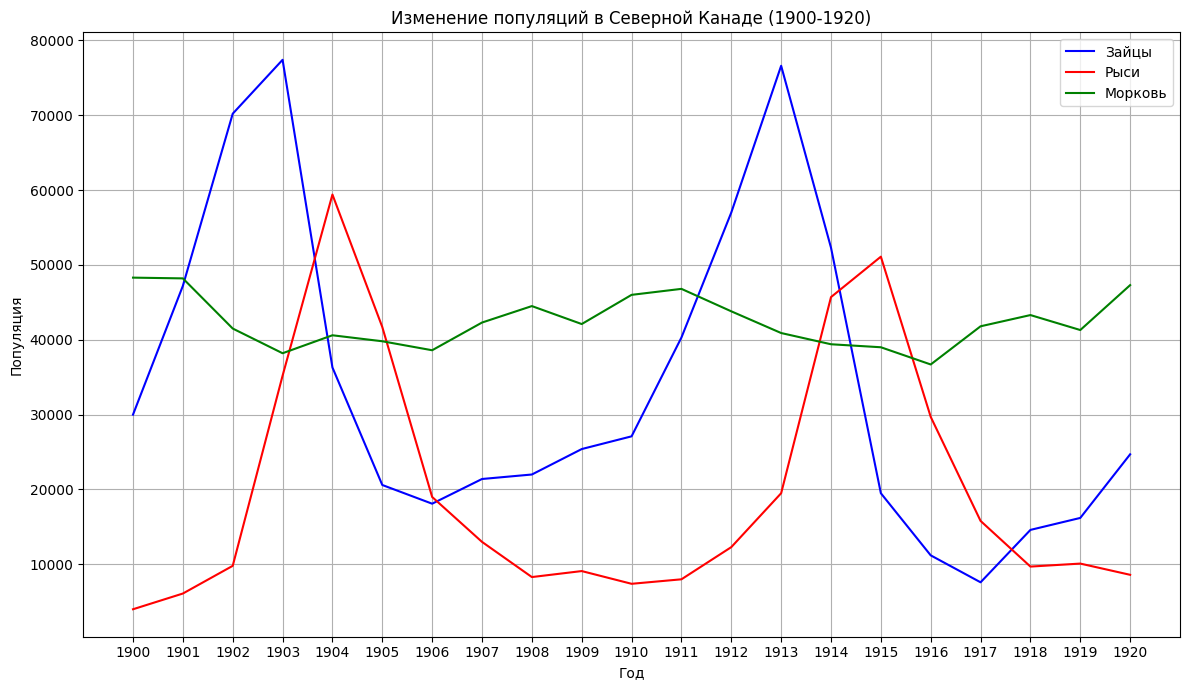

In [22]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(12, 7))

plt.plot(years, hares, label='Зайцы', color='blue')
plt.plot(years, lynxes, label='Рыси', color='red')
plt.plot(years, carrots, label='Морковь', color='green')

plt.title('Изменение популяций в Северной Канаде (1900-1920)')
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.legend()
plt.grid(True)
plt.xticks(years)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

- Find which year each species had the largest population. Mark these years in the plot of populations.

Год максимальной популяции для зайцев: 1903 (77400 особей)
Год максимальной популяции для рысей: 1904 (59400 особей)
Год максимальной популяции для моркови: 1900 (48300 кг)



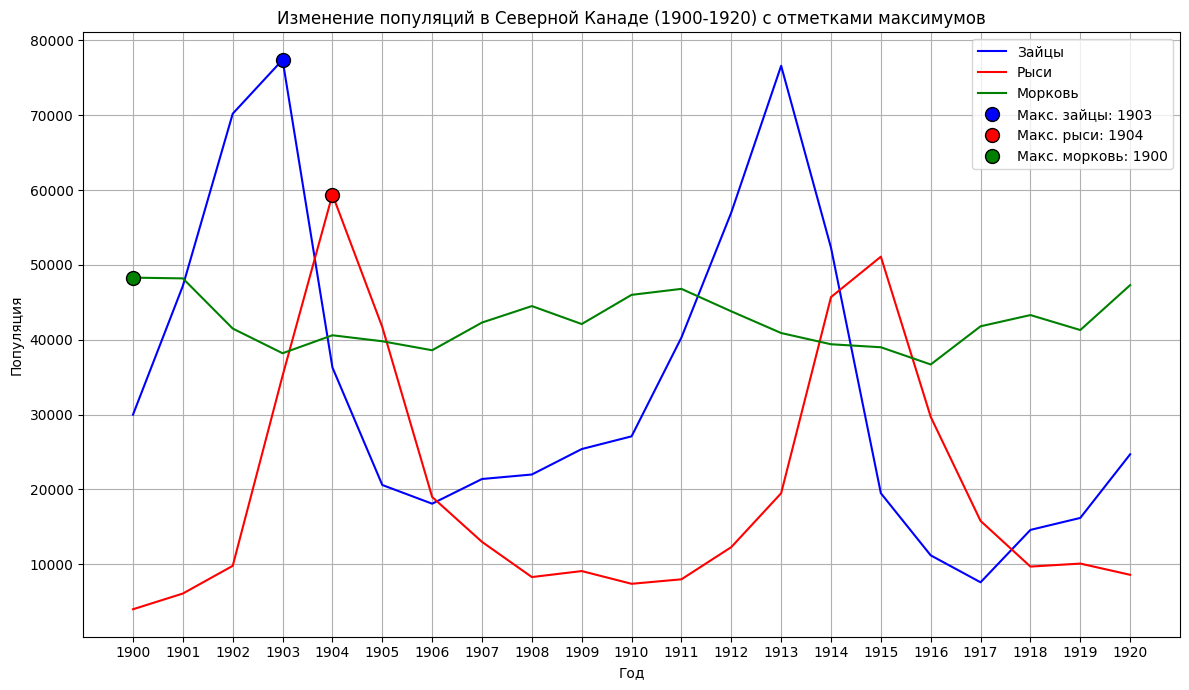

In [24]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

max_hare_idx = np.argmax(hares)
year_max_hares = int(years[max_hare_idx])
pop_max_hares = hares[max_hare_idx]

max_lynx_idx = np.argmax(lynxes)
year_max_lynxes = int(years[max_lynx_idx])
pop_max_lynxes = lynxes[max_lynx_idx]

max_carrot_idx = np.argmax(carrots)
year_max_carrots = int(years[max_carrot_idx])
pop_max_carrots = carrots[max_carrot_idx]

print(f"Год максимальной популяции для зайцев: {year_max_hares} ({pop_max_hares:.0f} особей)")
print(f"Год максимальной популяции для рысей: {year_max_lynxes} ({pop_max_lynxes:.0f} особей)")
print(f"Год максимальной популяции для моркови: {year_max_carrots} ({pop_max_carrots:.0f} кг)\n")

plt.figure(figsize=(12, 7))

plt.plot(years, hares, label='Зайцы', color='blue')
plt.plot(years, lynxes, label='Рыси', color='red')
plt.plot(years, carrots, label='Морковь', color='green')

plt.plot(year_max_hares, pop_max_hares, 'o', color='blue', markersize=10,
         label=f'Макс. зайцы: {year_max_hares}', markeredgecolor='black')
plt.plot(year_max_lynxes, pop_max_lynxes, 'o', color='red', markersize=10,
         label=f'Макс. рыси: {year_max_lynxes}', markeredgecolor='black')
plt.plot(year_max_carrots, pop_max_carrots, 'o', color='green', markersize=10,
         label=f'Макс. морковь: {year_max_carrots}', markeredgecolor='black')

plt.title('Изменение популяций в Северной Канаде (1900-1920) с отметками максимумов')
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.legend()
plt.grid(True)
plt.xticks(years)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

- Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

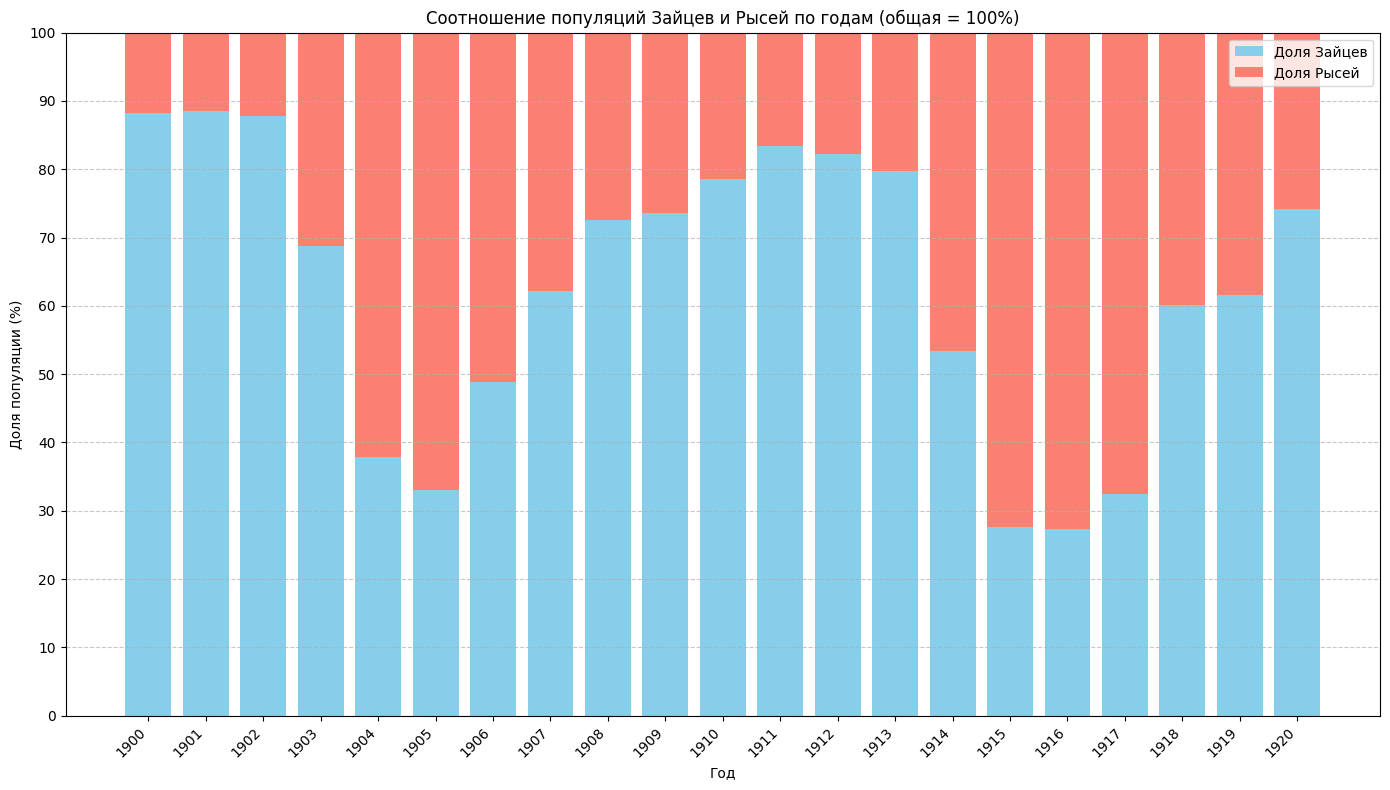

In [25]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

total_hares_lynxes = hares + lynxes

hare_ratio = (hares / total_hares_lynxes) * 100
lynx_ratio = (lynxes / total_hares_lynxes) * 100

plt.figure(figsize=(14, 8))

bar_width = 0.8

plt.bar(years, hare_ratio, bar_width, label='Доля Зайцев', color='skyblue')

plt.bar(years, lynx_ratio, bar_width, bottom=hare_ratio, label='Доля Рысей', color='salmon')

plt.title('Соотношение популяций Зайцев и Рысей по годам (общая = 100%)')
plt.xlabel('Год')
plt.ylabel('Доля популяции (%)')
plt.xticks(years, rotation=45, ha='right')
plt.yticks(np.arange(0, 101, 10))
plt.ylim(0, 100)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

Статистика популяций:
Зайцы: Среднее = 34080.95, Стд.откл. = 20897.91
Рыси: Среднее = 20166.67, Стд.откл. = 16254.59
Морковь: Среднее = 42400.00, Стд.откл. = 3322.51


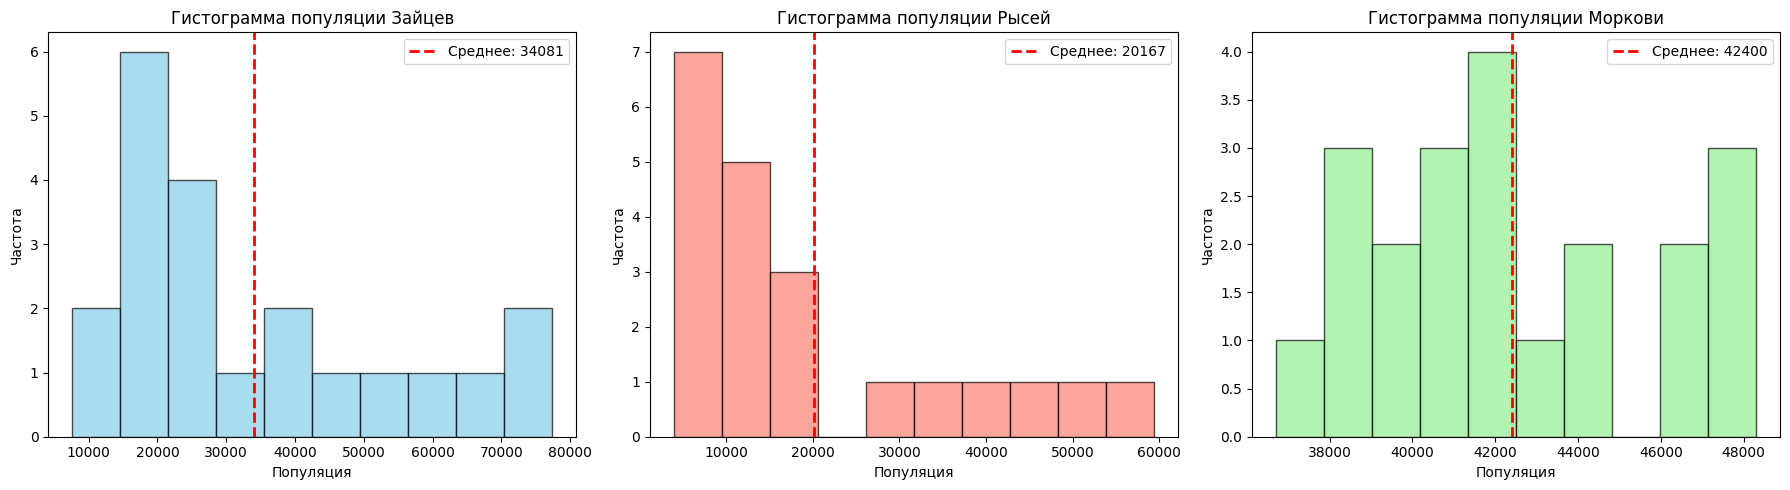

In [27]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

populations_data = {
    'Зайцы': hares,
    'Рыси': lynxes,
    'Морковь': carrots
}

print("Статистика популяций:")
for name, pop in populations_data.items():
    mean_val = np.mean(pop)
    std_val = np.std(pop)
    print(f"{name}: Среднее = {mean_val:.2f}, Стд.откл. = {std_val:.2f}")

plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
plt.hist(hares, bins=10, color='skyblue', edgecolor='black', alpha=0.7)
mean_hares = np.mean(hares)
plt.axvline(mean_hares, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_hares:.0f}')
plt.title('Гистограмма популяции Зайцев')
plt.xlabel('Популяция')
plt.ylabel('Частота')
plt.legend()
plt.ticklabel_format(axis='x', style='plain')

plt.subplot(1, 3, 2)
plt.hist(lynxes, bins=10, color='salmon', edgecolor='black', alpha=0.7)
mean_lynxes = np.mean(lynxes)
plt.axvline(mean_lynxes, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_lynxes:.0f}')
plt.title('Гистограмма популяции Рысей')
plt.xlabel('Популяция')
plt.ylabel('Частота')
plt.legend()
plt.ticklabel_format(axis='x', style='plain')

plt.subplot(1, 3, 3)
plt.hist(carrots, bins=10, color='lightgreen', edgecolor='black', alpha=0.7)
mean_carrots = np.mean(carrots)
plt.axvline(mean_carrots, color='red', linestyle='dashed', linewidth=2, label=f'Среднее: {mean_carrots:.0f}')
plt.title('Гистограмма популяции Моркови')
plt.xlabel('Популяция')
plt.ylabel('Частота')
plt.legend()
plt.ticklabel_format(axis='x', style='plain')


plt.tight_layout()
plt.show()

- Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

Вид с наибольшей популяцией для каждого года (Зайцы - H, Рыси - L):
[np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('L'), np.str_('L'), np.str_('L'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('H'), np.str_('L'), np.str_('L'), np.str_('L'), np.str_('H'), np.str_('H'), np.str_('H')]

Количество лет, когда доминировали зайцы (H): 15
Количество лет, когда доминировали рыси (L): 6


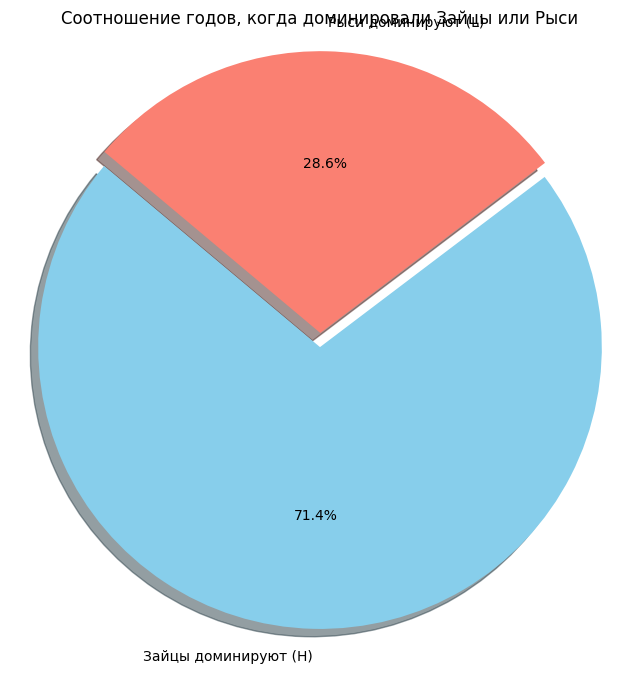

In [26]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

dominant_species_per_year = np.where(hares > lynxes, 'H', 'L')

print("Вид с наибольшей популяцией для каждого года (Зайцы - H, Рыси - L):")
print(list(dominant_species_per_year))

num_hares_dominant = np.sum(dominant_species_per_year == 'H')
num_lynxes_dominant = np.sum(dominant_species_per_year == 'L')

print(f"\nКоличество лет, когда доминировали зайцы (H): {num_hares_dominant}")
print(f"Количество лет, когда доминировали рыси (L): {num_lynxes_dominant}")

labels = ['Зайцы доминируют (H)', 'Рыси доминируют (L)']
sizes = [num_hares_dominant, num_lynxes_dominant]
colors = ['skyblue', 'salmon']
explode = (0.05, 0)

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)
plt.title('Соотношение годов, когда доминировали Зайцы или Рыси')
plt.axis('equal')
plt.show()

- Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.

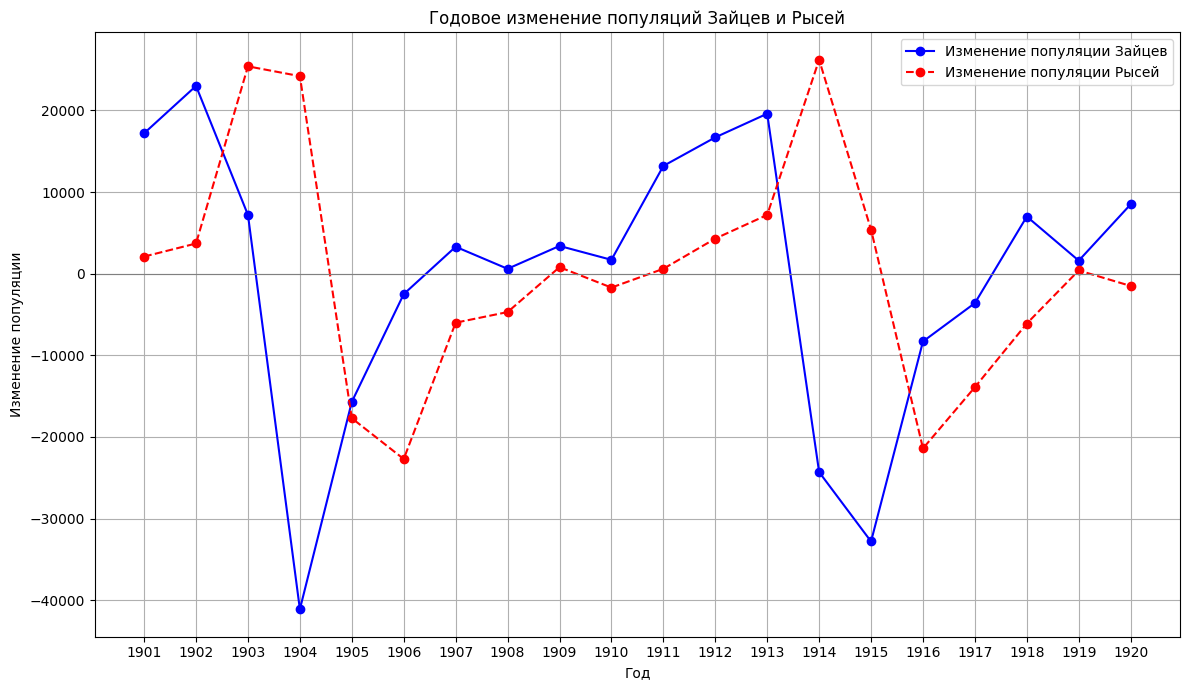


Коэффициент корреляции между годовыми изменениями популяции зайцев и рысей: -0.1780


In [29]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

change_years = years[1:]
change_hares = np.diff(hares)
change_lynxes = np.diff(lynxes)

plt.figure(figsize=(12, 7))
plt.plot(change_years, change_hares, label='Изменение популяции Зайцев', color='blue', marker='o', linestyle='-')
plt.plot(change_years, change_lynxes, label='Изменение популяции Рысей', color='red', marker='o', linestyle='--')

plt.title('Годовое изменение популяций Зайцев и Рысей')
plt.xlabel('Год')
plt.ylabel('Изменение популяции')
plt.axhline(0, color='gray', linestyle='-', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.xticks(change_years)
plt.ticklabel_format(axis='y', style='plain')
plt.tight_layout()
plt.show()

correlation_coefficient = np.corrcoef(change_hares, change_lynxes)[0, 1]

print(f"\nКоэффициент корреляции между годовыми изменениями популяции зайцев и рысей: {correlation_coefficient:.4f}")

- Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).

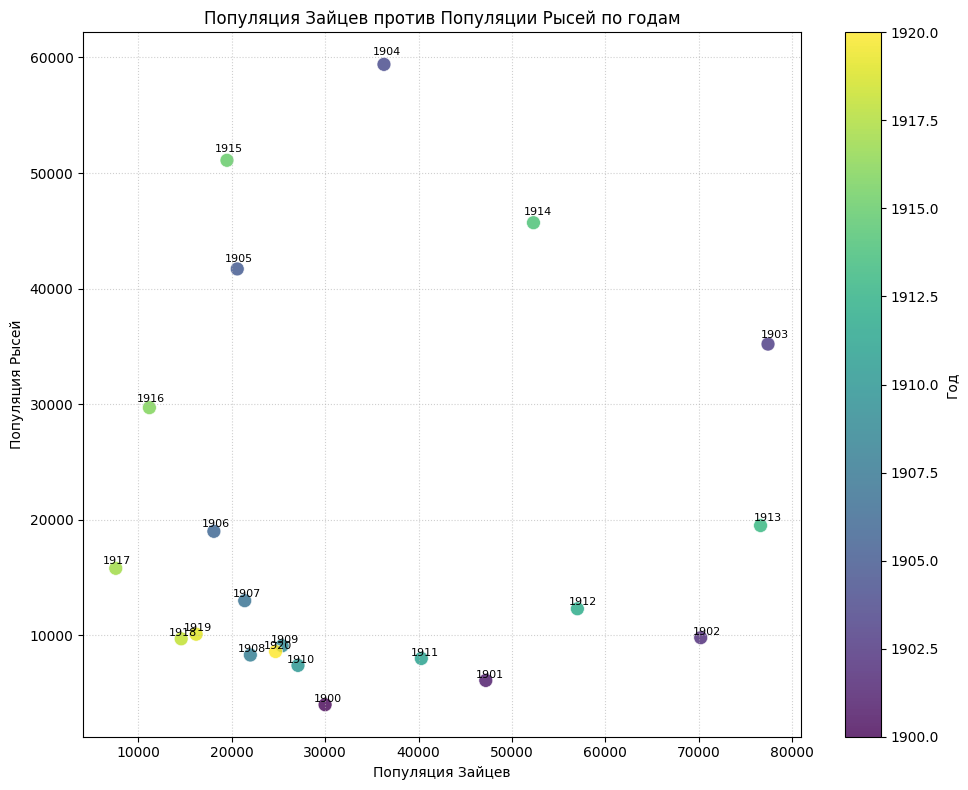

In [31]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(10, 8))

plt.scatter(hares, lynxes, c=years, cmap='viridis', s=100, alpha=0.8, edgecolors='w', linewidth=0.5, label='Год')

for i, year in enumerate(years):
    x_offset = hares[i] * 0.01
    y_offset = lynxes[i] * 0.01

    plt.text(hares[i] + x_offset, lynxes[i] + y_offset, str(year), fontsize=8, ha='center', va='bottom')

plt.title('Популяция Зайцев против Популяции Рысей по годам')
plt.xlabel('Популяция Зайцев')
plt.ylabel('Популяция Рысей')
plt.grid(True, linestyle=':', alpha=0.6)

cbar = plt.colorbar()
cbar.set_label('Год')

plt.ticklabel_format(axis='x', style='plain')
plt.ticklabel_format(axis='y', style='plain')

plt.tight_layout()
plt.show()

- Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value
with the true value and print a ratio of the error to the true value.

In [30]:
data = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/Статпрак/populations.txt')

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

year_to_estimate = 1920

true_hare_1920 = hares[-1]

previous_hare_populations = hares[:-1]

estimated_hare_1920 = np.mean(previous_hare_populations)

print(f"Истинная популяция зайцев в {year_to_estimate} году: {true_hare_1920:.0f}")
print(f"Оценочная популяция зайцев в {year_to_estimate} году (среднее): {estimated_hare_1920:.0f}")

absolute_error = abs(true_hare_1920 - estimated_hare_1920)

ratio_of_error_to_true_value = absolute_error / true_hare_1920

print(f"\nАбсолютная ошибка оценки: {absolute_error:.0f}")
print(f"Отношение ошибки к истинному значению: {ratio_of_error_to_true_value:.4f} ({ratio_of_error_to_true_value*100:.2f}%)")

Истинная популяция зайцев в 1920 году: 24700
Оценочная популяция зайцев в 1920 году (среднее): 34550

Абсолютная ошибка оценки: 9850
Отношение ошибки к истинному значению: 0.3988 (39.88%)
